In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from missing_values import *

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

path = '/Users/barganor/Downloads/XY_train (1).csv'

data = pd.read_csv(path)
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,13163,city_16,0.910,NaN,No relevent experience,no_enrollment,High School,NaN,2,NaN,NaN,never,16,1
1,9357,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,6,1000-4999,Pvt Ltd,1,262,0
2,604,city_16,0.910,Male,No relevent experience,NaN,NaN,NaN,3,NaN,NaN,never,24,0
3,19033,city_16,0.910,Male,No relevent experience,no_enrollment,High School,NaN,3,NaN,NaN,1,35,0
4,4825,city_145,0.555,Male,Has relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,1,43,1


## Pre-processing

In [2]:
processed_data = drop_nan_by_thresh(data, 12)

Number Of rows dropped: 2287
Number Of nan values dropped: 7852


In [3]:
processed_data = replace_by_dict(processed_data, 'company_size')

Values before change  Values after change
                 <10                  1.0
              Oct-49                  2.0
               50-99                  3.0
             100-500                  4.0
             500-999                  5.0
           1000-4999                  6.0
           5000-9999                  7.0
              10000+                  8.0


In [4]:
processed_data = replace_by_dict(processed_data, 'last_new_job')

Values before change  Values after change
               never                  0.0
                   1                  1.0
                   2                  2.0
                   3                  3.0
                   4                  4.0
                  >4                  5.0


In [5]:
processed_data = replace_by_dict(processed_data, 'major_discipline')

Values before change  Values after change
                STEM                  0.0
          Humanities                  1.0
               Other                  2.0
     Business Degree                  3.0
                Arts                  4.0
            No Major                  5.0


In [6]:
processed_data = replace_by_dict(processed_data, 'experience')

Values before change Values after change
                  <1                   0
                   1                   1
                  10                  10
                  11                  11
                  12                  12
                  13                  13
                  14                  14
                  15                  15
                  16                  16
                  17                  17
                  18                  18
                  19                  19
                   2                   2
                  20                  20
                 >20                  25
                   3                   3
                   4                   4
                   5                   5
                   6                   6
                   7                   7
                   8                   8
                   9                   9


In [7]:
processed_data = fill_nan_with_median(processed_data, 'experience')

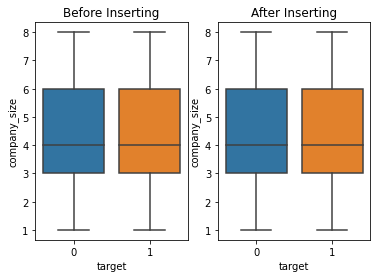

In [8]:
processed_data = fill_nan_with_probability(processed_data, 'company_size')

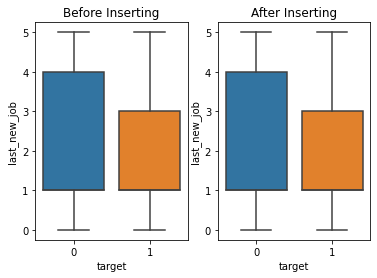

In [9]:
processed_data = fill_nan_with_probability(processed_data, 'last_new_job')

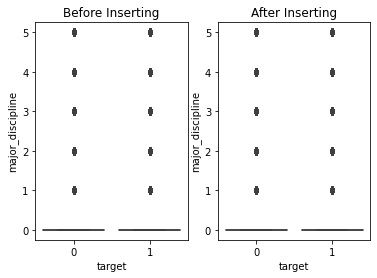

In [10]:
processed_data = fill_nan_with_probability(processed_data, 'major_discipline')

In [11]:
processed_data =  fill_nan_with_max_appear(processed_data, 'education_level')

In [12]:
processed_data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    2272
relevent_experience          0
enrolled_university        105
education_level              0
major_discipline             0
experience                   0
company_size                 0
company_type              2771
last_new_job                 0
training_hours               0
target                       0
dtype: int64